## Introduction

The objective of this investigation is to develop a classification model that can predict what kind of grades a student will receive given information about that student relating to their demographics, personal wellbeing, motivations, and academic profile. A high performing model can enable educators and policymakers to better understand how these features impact academic performance. It can also be used to enable the development of new programs, strategies, and interventions to improve overall academic performance.

[Link to Dataset](https://archive.ics.uci.edu/dataset/320/student+performance)

In [ ]:
!pip install ucimlrepo

In [7]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 

##  Data Pre-Processing

In [10]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

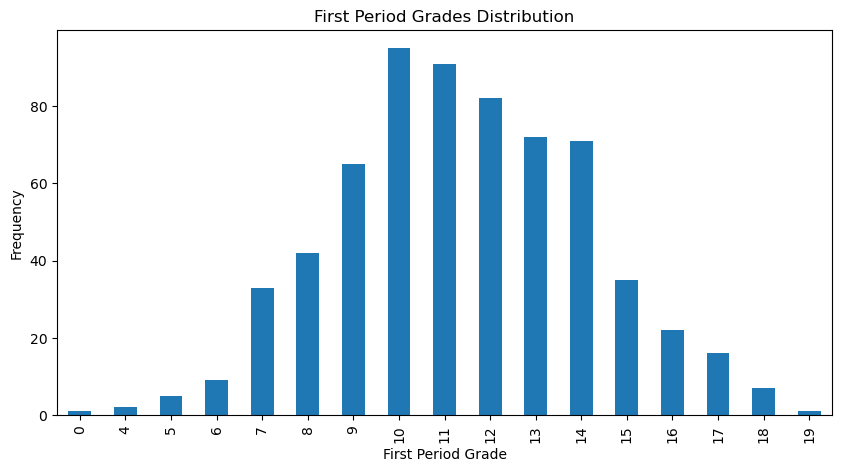

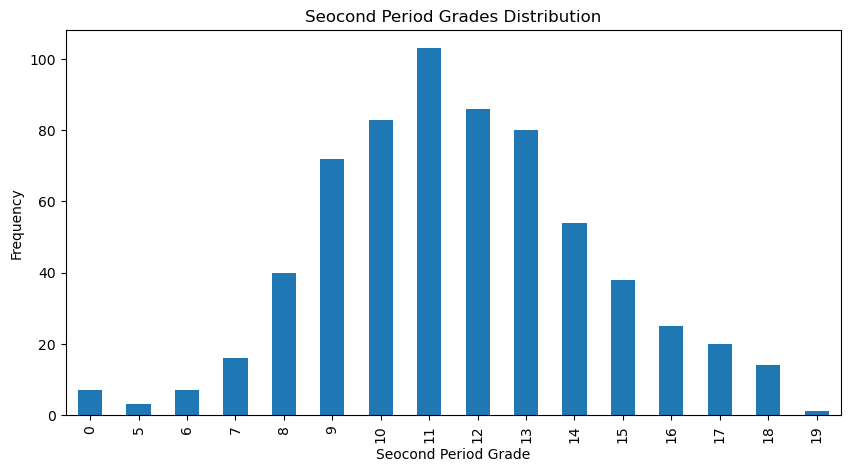

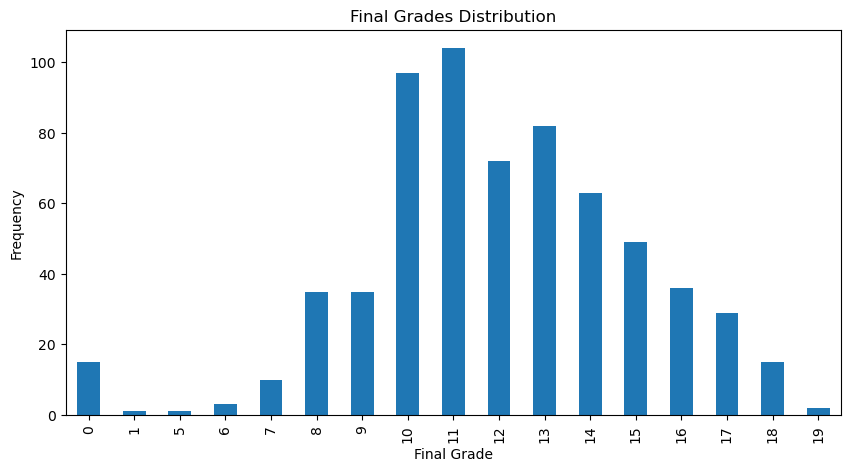

In [11]:
y['G1'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.xlabel('First Period Grade')
plt.ylabel('Frequency')
plt.title('First Period Grades Distribution')
plt.show()

y['G2'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Seocond Period Grade')
plt.ylabel('Frequency')
plt.title('Seocond Period Grades Distribution')
plt.show()

y['G3'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.title('Final Grades Distribution')
plt.show()

In [12]:
X = X.dropna()

In [13]:
encoder = LabelEncoder()
X['famsize'] = encoder.fit_transform(X['famsize'])

In [14]:
X = pd.get_dummies(X, columns=['Mjob','Fjob','reason','guardian'])

In [15]:
X['school'] = X['school'].replace({'GP': 1, 'MS': 0})
X['address'] = X['address'].replace({'U': 1, 'R': 0})
X['sex'] = X['sex'].replace({'F': 1, 'M': 0})
X['famsize'] = X['famsize'].replace({'GT3': 1, 'LE3': 0})
X['Pstatus'] = X['Pstatus'].replace({'A': 1, 'T': 0})
X = X.replace({'yes': 1, 'no': 0})

In [25]:
X = X.astype(int)

In [27]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [29]:
y['binary_classes'] = (y['G3'] >= 10).astype(int)

In [31]:
def categorize_grades(grade):
    if grade < 10:
        return 0  # Fail
    elif grade < 14:
        return 1  # Sufficient
    elif grade < 16:
        return 2  # Good
    elif grade < 18:
        return 3  # Very Good
    else:
        return 4  # Excellent

y['grade_category'] = y['G3'].apply(categorize_grades)

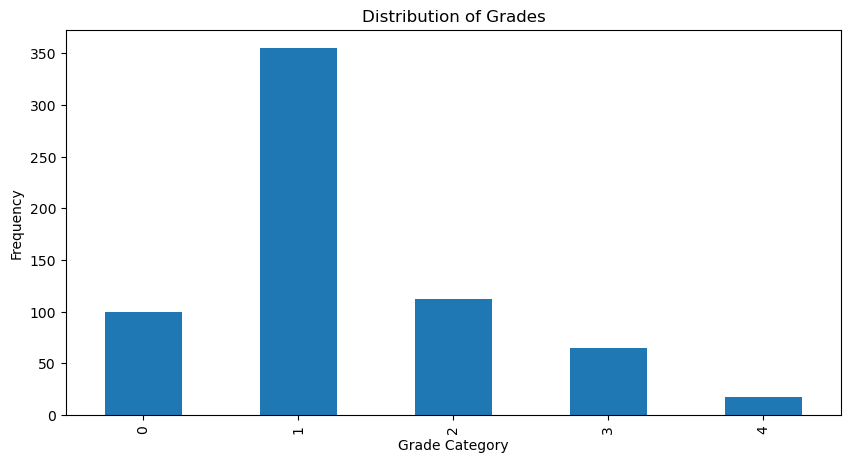

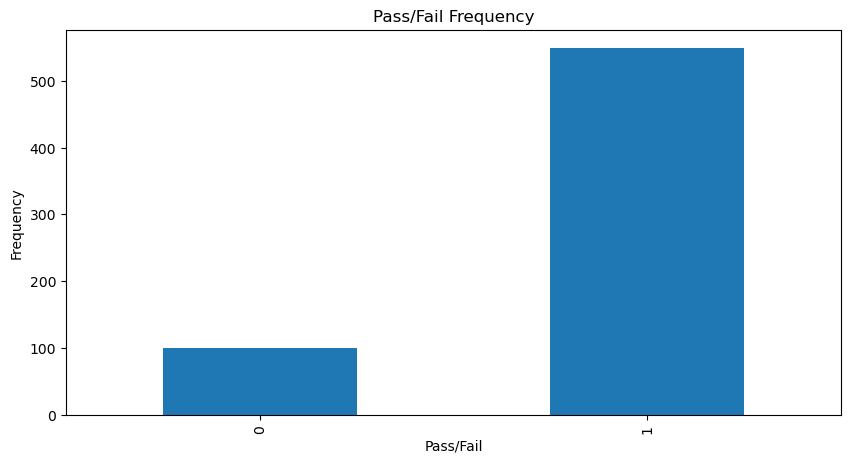

In [33]:
y['grade_category'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Grade Category')
plt.ylabel('Frequency')
plt.title('Distribution of Grades')
plt.show()

y['binary_classes'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Pass/Fail')
plt.ylabel('Frequency')
plt.title('Pass/Fail Frequency')
plt.show()

I'm going to try every classification model we've learned so far because the dataset is small and I can easily compare results across these models.
For the binary classification I'll start with logistic regression.
For the multi-class classification I'll try basically everything and maybe try using something like XGBoost.